## Chances e Acréscimos

### Chances

As **chances a favor** de um evento são a razão entre a probabilidade de ocorrência e a probabilidade de não ocorrer.

**Probabilidade** e **Chances** são diferentes representações para a mesma informações;

In [1]:
# Probabilidade -> Chances
def Odds(p):
    return p/(1-p)

In [3]:
# Chances -> Probabilidade
def Probability(o):
    return o/(o+1)

# or
def Probability2(yes, no):
    return yes/(yes+no)

### As Chances a partir do teorema de bayes

- A constante de normalização desaparece da equação;
- Reescrevendo a chance em favor de A;

\begin{equation}
    o(A|D) = o(A)\frac{p(D|A)}{p(D|B)}
\end{equation}


- A posteriori é igual a priori vezes a razão de verossimilhança;
- Muito usual para se calcular bayes de cabeça ou no papel; 

### Sangue de Oliver

- Duas pessoas deixaram vestígios de seu próprio sangue na cena do crime;
- Um suspeito, Oliver, é testado e tem sangue tipo 'O';
-  Os grupos sanguíneos dos dois traços são do tipo 'O' (um tipo comum na população local, com frequência de 60%) e do tipo 'AB' (um tipo raro, com frequência de 1%). 

Esses dados, dão evidência a favor da proposição de que Oliver era uma das pessoas?

\begin{equation}
    \frac{o(A|D)}{o(A)} = \frac{p(D|A)}{p(D|B)}
\end{equation}

- 1º termo: Razão entre posteriori e priori;
- 2º termo: Razão de verossimilhança (**fator bayes**)

Fator Bayes > 1: Os dados é mais provável sob A do que de B;
Fotor Bayes < 1: O contrário;

Fotor de Bayes = 1: Os dados são igualmente provável;



### Acréscimo

A **operação fundamental** das estatísticas bayesianas é a **Atualização** , que recebe uma distribuição prévia e um conjunto de dados e produz uma distribuição posterior. Mas existe outras operações:
- Máxima;
- Adição;
- Dimensionamento;
- Mínima;
- Mistura.


Duas maneiras para calcular:
- **Simulação**: Dado um Pmf que representa a distribuição de um único dado, você pode coletar amostras aleatórias, adicioná-las e acumular a distribuição de somas simuladas.
- **Enumeração**: Dados dois Pmfs, você pode enumerar todos os pares possíveis de valores e calcular a distribuição das somas.

In [1]:
from thinkbayes import Pmf, SampleSum
class Die(Pmf):
    def __init__(self, sides):
        super().__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [2]:
d6 = Die(6)

In [3]:
from thinkplot import Pmf as plt_Pmf, Pmfs as plt_Pmfs, Show
dice = [d6]*3
three = SampleSum(dice, 1000)
three.Print()

3 0.0625
4 0.0625
5 0.0625
6 0.0625
7 0.0625
8 0.0625
9 0.0625
10 0.0625
11 0.0625
12 0.0625
13 0.0625
14 0.0625
15 0.0625
16 0.0625
17 0.0625
18 0.0625


- A desvantagem da simulação é que o resultado é apenas aproximadamente correto;

In [6]:
three_exact = d6+d6+d6

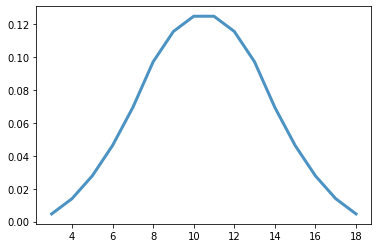

In [7]:
plt_Pmf(three_exact)

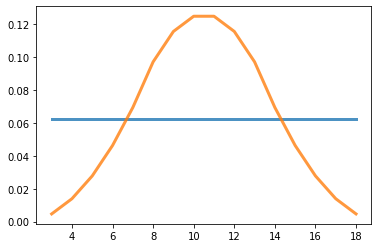

In [6]:
thinkplot.Pmfs([three, three_exact])

### Máxima

Existem três maneiras de calcular a distribuição de máximo:
- Simulação;
- Enumeração;
- Exponenciação;

### Misturas

### Discussão

-  Uma distribuição é qualquer estrutura de dados que representa um conjunto de valores (possíveis resultados de um processo aleatório) e suas probabilidades.
- A principal diferença entre eles é o desempenho: algumas operações são mais rápidas e fáceis com um Pmf; outros são mais rápidos com um Cdf.
- Introduzir operações que atuam sobre distribuições, como Pmf.__add__, Cdf.Max e thinkbayes.MakeMixture .